In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

pd.set_option('display.max_columns', None)

In [124]:
customer_features = pd.read_excel('quarterly_features.xlsx')
customer_features

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,defect_ratio,delivery_method,good_type,Geo,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0.000000,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0.400000,5,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0.538462,0,0,0,3,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,0.0,238.00,0.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,0.0,343.63,0.000000,1,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,0.0,954.22,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,0.0,294.00,0.909091,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Preparation 

In [125]:
customer_features.dtypes

Телефон_new                    object
quarter                        object
total_orders                    int64
unique_sku                      int64
avg_sku_per_order             float64
avg_check                     float64
med_check                     float64
avg_sku_check                 float64
med_sku_check                 float64
mean_days_between_orders      float64
median_days_between_orders    float64
total_margin                  float64
defect_ratio                  float64
delivery_method                 int64
good_type                       int64
Geo                             int64
ДЕТСКОЕ ПИТАНИЕ                 int64
ЖЕНСКИЕ ШТУЧКИ                  int64
ИГРУШКИ                         int64
КАНЦТОВАРЫ, КНИГИ, ДИСКИ        int64
КОСМЕТИКА/ГИГИЕНА               int64
КРУПНОГАБАРИТНЫЙ ТОВАР          int64
ОБУВЬ                           int64
ПОДГУЗНИКИ                      int64
СОПУТСТВУЮЩИЕ ТОВАРЫ            int64
ТЕКСТИЛЬ, ТРИКОТАЖ              int64
ТЕХНИКА И ТО

In [126]:
df = customer_features.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

random_data = np.random.random_sample(scaled_data.shape)

In [27]:
k_range = range(5, 20)
sse, silhouette_scores, dbi_scores, ch_scores, gap_values = [], [], [], [], []

In [28]:
customer_features

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,defect_ratio,delivery_method,Geo,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0.500000,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0.600000,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0.000000,0,-1,1,0,0,0,0,0,0,2,0,0,0,0,0
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0.400000,5,-1,0,0,0,0,2,0,0,0,0,0,0,0,0
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0.538462,0,-1,3,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,0.0,238.00,0.000000,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,0.0,343.63,0.000000,1,-1,0,0,2,0,1,0,0,0,0,0,0,2,0
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,0.0,954.22,0.333333,1,-1,0,0,0,0,0,0,0,0,0,2,0,0,0
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,0.0,294.00,0.909091,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0


# Defining the number of clusters

In [29]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    
    sse.append(kmeans.inertia_)

In [32]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    
    dbi_scores.append(davies_bouldin_score(scaled_data, labels))

In [33]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    
    ch_scores.append(calinski_harabasz_score(scaled_data, labels))

In [ ]:
for k in range(5, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    
    random_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(random_data)
    gap_values.append(np.log(np.mean(cdist(random_data, random_kmeans.cluster_centers_, 'euclidean'))) -
                      np.log(np.mean(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'))))

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    
    silhouette_scores.append(silhouette_score(scaled_data, labels))

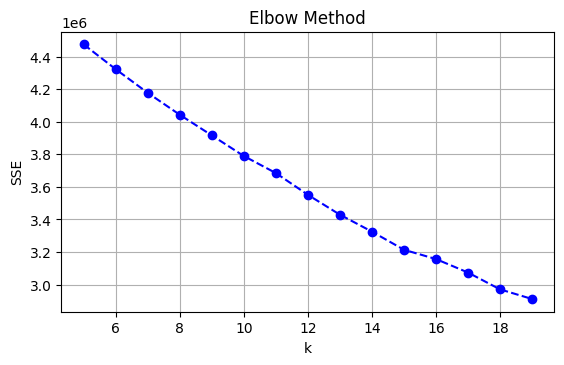

In [37]:
plt.figure(figsize=(14, 8))

# Elbow method
plt.subplot(2, 2, 1)
plt.plot(k_range, sse, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)

plt.show()

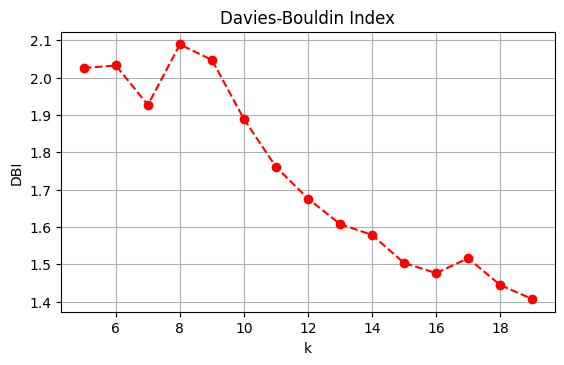

In [40]:
plt.figure(figsize=(14, 8))

# Davies-Bouldin Index
plt.subplot(2, 2, 3)
plt.plot(k_range, dbi_scores, marker='o', linestyle='--', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('k')
plt.ylabel('DBI')
plt.grid(True)

plt.show()

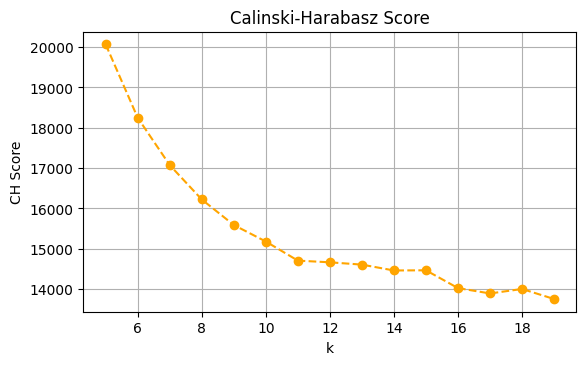

In [41]:
plt.figure(figsize=(14, 8))

# Calinski-Harabasz Score
plt.subplot(2, 2, 4)
plt.plot(k_range, ch_scores, marker='o', linestyle='--', color='orange')
plt.title('Calinski-Harabasz Score')
plt.xlabel('k')
plt.ylabel('CH Score')
plt.grid(True)

plt.show()

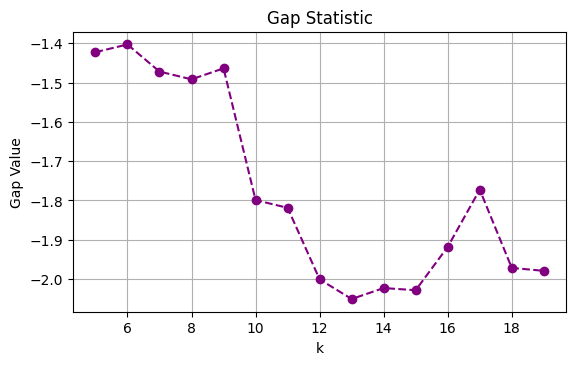

In [43]:
plt.figure(figsize=(14, 8))

# Gap Statistic
plt.subplot(2, 2, 4)
plt.plot(k_range, gap_values, marker='o', linestyle='--', color='purple')
plt.title('Gap Statistic')
plt.xlabel('k')
plt.ylabel('Gap Value')
plt.grid(True)

plt.show()


In [38]:
# plt.figure(figsize=(6, 4))

# # Silhouette Score
# plt.subplot(2, 2, 2)
# plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='green')
# plt.title('Silhouette Score')
# plt.xlabel('k')
# plt.ylabel('Silhouette')
# plt.grid(True)

# plt.show()

In [ ]:
    # silhouette_scores.append(silhouette_score(scaled_data, labels))
    # dbi_scores.append(davies_bouldin_score(scaled_data, labels))
    # ch_scores.append(calinski_harabasz_score(scaled_data, labels))
    
    # random_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(random_data)
    # gap_values.append(np.log(np.mean(cdist(random_data, random_kmeans.cluster_centers_, 'euclidean'))) -
    #                   np.log(np.mean(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'))))

# Clustering

## 12 clusters

In [127]:
df = customer_features.copy()
df

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,defect_ratio,delivery_method,good_type,Geo,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0.000000,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0.400000,5,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0.538462,0,0,0,3,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,0.0,238.00,0.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,0.0,343.63,0.000000,1,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,0.0,954.22,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,0.0,294.00,0.909091,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [128]:
df['quarter'] = df['quarter'].astype(str)
features = df.select_dtypes(include=[np.number]).columns.tolist()

features = [f for f in features if f not in ['Телефон_new', 'cluster_kmeans', 'cluster_gmm']]

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [129]:
kmeans_labels = []
gmm_labels = []
quarters = df['quarter'].unique()

In [130]:
for quarter in quarters:
    df_quarter = df[df['quarter'] == quarter]
    
    X = df_quarter[features]

    kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)              # KMeans
    kmeans.fit(X)
    df.loc[df['quarter'] == quarter, 'cluster_kmeans'] = kmeans.labels_
    
    gmm = GaussianMixture(n_components=12, random_state=42)                 # GMM
    gmm.fit(X)
    df.loc[df['quarter'] == quarter, 'cluster_gmm'] = gmm.predict(X)

In [131]:
df_sorted = df.sort_values(by=['Телефон_new', 'quarter'])

df_sorted['prev_cluster_kmeans'] = df_sorted.groupby('Телефон_new')['cluster_kmeans'].shift(1)
df_sorted['prev_cluster_gmm'] = df_sorted.groupby('Телефон_new')['cluster_gmm'].shift(1)

df_transitions = df_sorted.dropna(subset=['prev_cluster_kmeans', 'prev_cluster_gmm'])

In [132]:
# Transition Matrix
transition_matrix_kmeans = pd.crosstab(df_transitions['prev_cluster_kmeans'], df_transitions['cluster_kmeans'], normalize='index')
transition_matrix_gmm = pd.crosstab(df_transitions['prev_cluster_gmm'], df_transitions['cluster_gmm'], normalize='index')


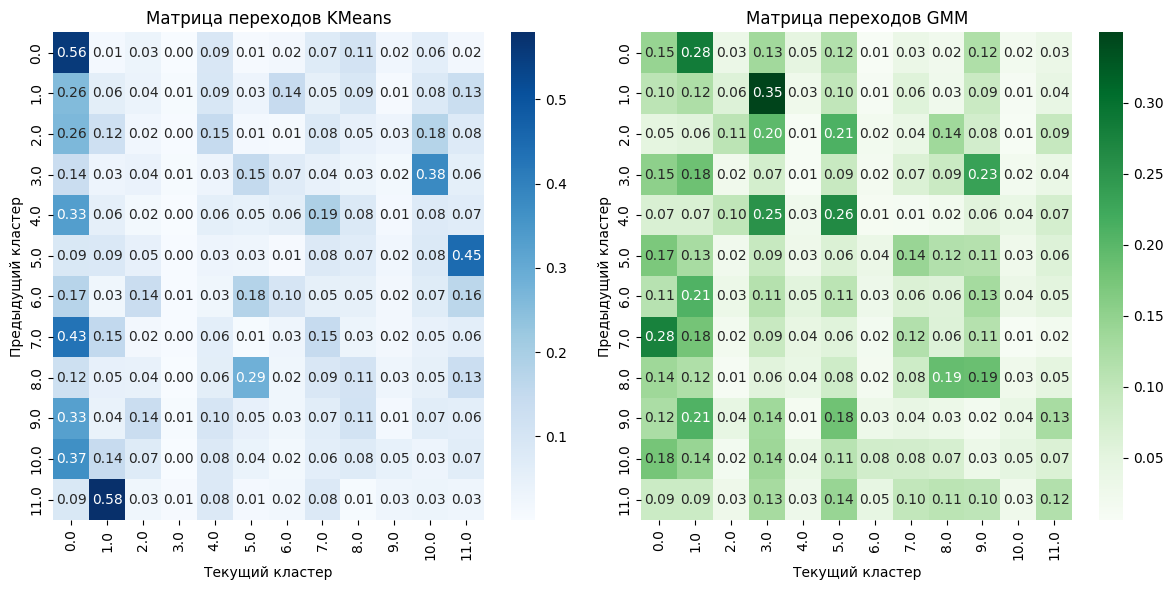

In [133]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)                                                                # KMeans
sns.heatmap(transition_matrix_kmeans, annot=True, fmt='.2f', cmap='Blues')
plt.title('Матрица переходов KMeans')
plt.xlabel('Текущий кластер')
plt.ylabel('Предыдущий кластер')

plt.subplot(1, 2, 2)                                                                # GMM
sns.heatmap(transition_matrix_gmm, annot=True, fmt='.2f', cmap='Greens')
plt.title('Матрица переходов GMM')
plt.xlabel('Текущий кластер')
plt.ylabel('Предыдущий кластер')

plt.tight_layout()
plt.show()

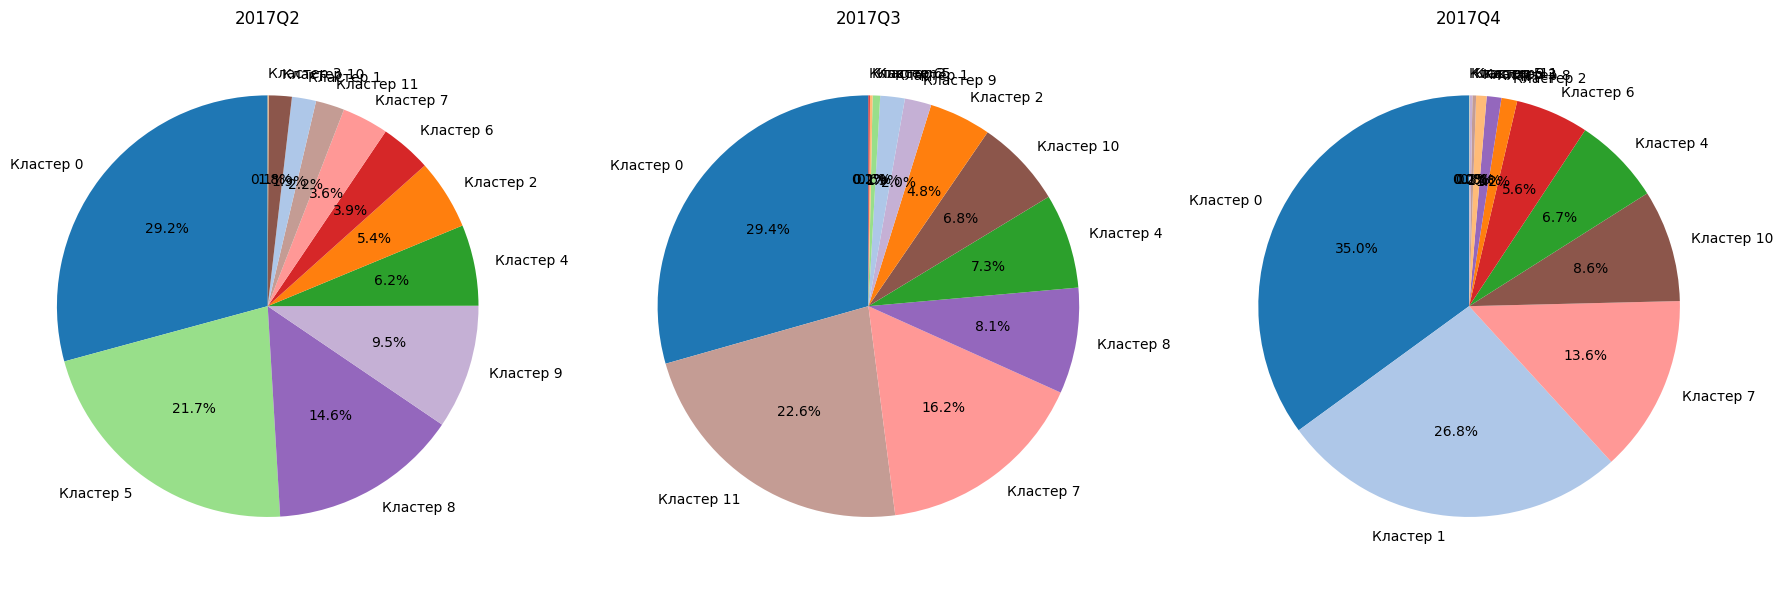

In [134]:
quarters = ['2017Q2', '2017Q3', '2017Q4']
df_filtered = df[df['quarter'].isin(quarters)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = plt.cm.tab20.colors

for i, quarter in enumerate(quarters):
    ax = axes[i]
    cluster_counts = df_filtered[df_filtered['quarter'] == quarter]['cluster_kmeans'].value_counts()
    labels = [f'Кластер {int(label)}' for label in cluster_counts.index]
    wedges, texts, autotexts = ax.pie(cluster_counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=[colors[int(label) % len(colors)] for label in cluster_counts.index])
    ax.set_title(quarter)
    ax.axis('equal')  

plt.tight_layout()
plt.show()


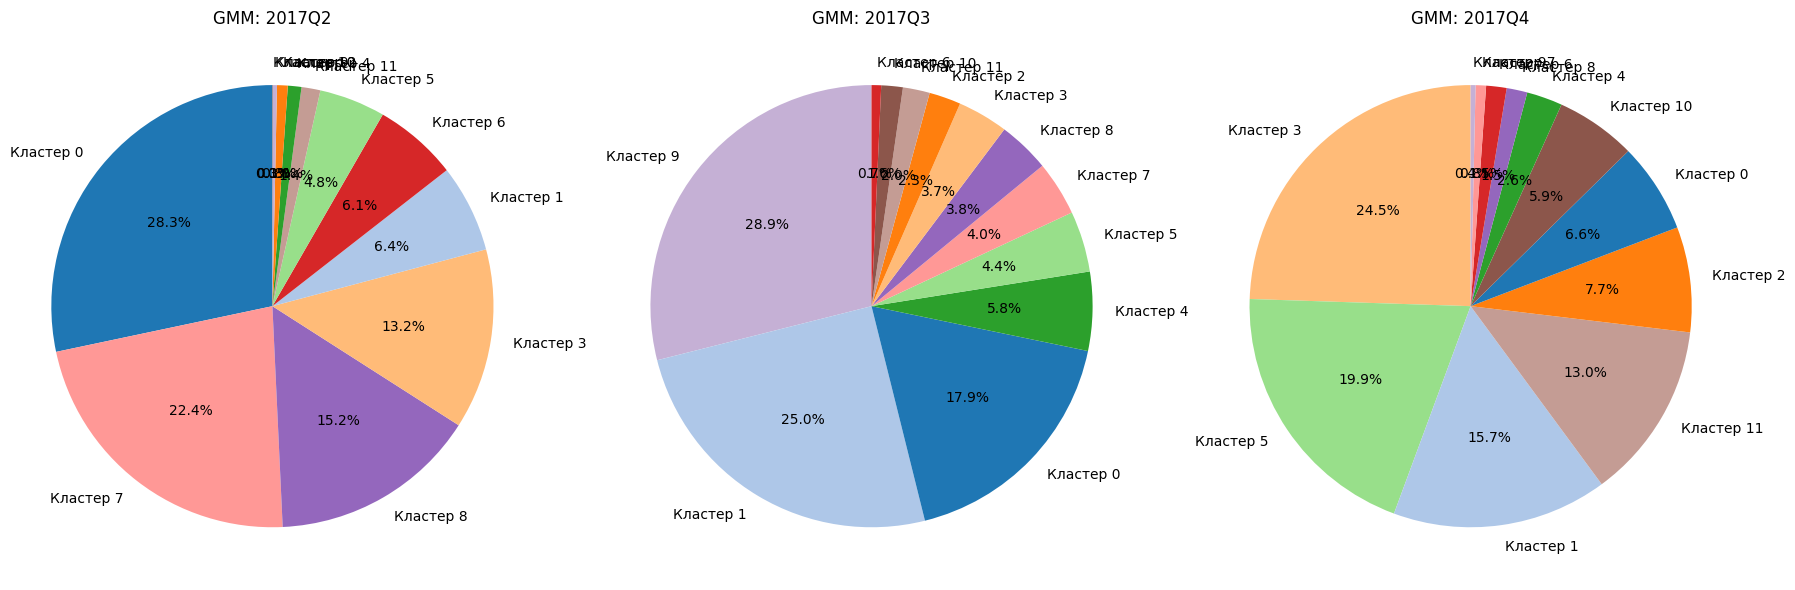

In [135]:
quarters = ['2017Q2', '2017Q3', '2017Q4']
df_filtered_gmm = df[df['quarter'].isin(quarters)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = plt.cm.tab20.colors

for i, quarter in enumerate(quarters):
    ax = axes[i]
    cluster_counts = df_filtered_gmm[df_filtered_gmm['quarter'] == quarter]['cluster_gmm'].value_counts()
    labels = [f'Кластер {int(label)}' for label in cluster_counts.index]
    wedges, texts, autotexts = ax.pie(
        cluster_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colors[int(label) % len(colors)] for label in cluster_counts.index]
    )
    ax.set_title(f'GMM: {quarter}')
    ax.axis('equal')

plt.tight_layout()
plt.show()

#### Matching GMM clusters between quarters by profile

In [109]:
cluster_profiles = df.groupby(['quarter', 'cluster_gmm'])[features].mean().reset_index()

In [111]:
profiles_q2 = cluster_profiles[cluster_profiles['quarter'] == '2017Q2'].set_index('cluster_gmm')[features]
profiles_q3 = cluster_profiles[cluster_profiles['quarter'] == '2017Q3'].set_index('cluster_gmm')[features]
profiles_q4 = cluster_profiles[cluster_profiles['quarter'] == '2017Q4'].set_index('cluster_gmm')[features]


In [112]:
scaler_q2 = StandardScaler().fit(profiles_q2)
scaler_q3 = StandardScaler().fit(profiles_q3)
scaler_q4 = StandardScaler().fit(profiles_q4)

profiles_q2_scaled = pd.DataFrame(scaler_q2.transform(profiles_q2), index=profiles_q2.index, columns=features)
profiles_q3_scaled = pd.DataFrame(scaler_q3.transform(profiles_q3), index=profiles_q3.index, columns=features)
profiles_q4_scaled = pd.DataFrame(scaler_q4.transform(profiles_q4), index=profiles_q4.index, columns=features)

In [113]:
dist_q2_q3 = pd.DataFrame(
    cdist(profiles_q2_scaled.values, profiles_q3_scaled.values),
    index=[f'Q2_{i}' for i in profiles_q2_scaled.index],
    columns=[f'Q3_{i}' for i in profiles_q3_scaled.index]
).round(2)

dist_q3_q4 = pd.DataFrame(
    cdist(profiles_q3_scaled.values, profiles_q4_scaled.values),
    index=[f'Q3_{i}' for i in profiles_q3_scaled.index],
    columns=[f'Q4_{i}' for i in profiles_q4_scaled.index]
).round(2)


In [114]:
display(dist_q2_q3)

,Q3_0.0,Q3_1.0,Q3_2.0,Q3_3.0,Q3_4.0,Q3_5.0,Q3_6.0,Q3_7.0,Q3_8.0,Q3_9.0,Q3_10.0,Q3_11.0
Q2_0.0,5.66,1.33,8.07,5.76,5.73,8.55,12.41,8.24,6.86,4.38,4.96,11.60
Q2_1.0,5.46,4.61,6.54,4.46,4.54,7.40,11.12,5.81,5.66,3.66,3.53,10.03
Q2_2.0,5.60,8.46,3.77,4.06,5.47,5.97,6.26,9.26,3.86,6.72,4.99,7.75
Q2_3.0,5.60,6.85,8.02,6.83,7.12,8.66,10.51,4.79,6.98,7.75,5.90,10.64
Q2_4.0,3.61,4.86,5.95,3.48,4.87,6.83,10.38,8.50,4.95,3.20,2.93,9.29
Q2_5.0,7.64,8.94,4.12,5.61,6.00,5.31,9.44,9.90,5.84,6.90,6.13,5.49
Q2_6.0,3.84,4.91,5.20,2.82,3.54,6.43,9.94,6.71,4.34,3.11,1.52,9.07
Q2_7.0,4.56,6.11,5.30,3.23,3.49,6.45,10.17,8.34,4.85,3.81,2.67,9.39
Q2_8.0,10.63,11.61,7.33,8.77,10.12,9.04,6.39,8.96,9.21,10.30,8.88,5.79
Q2_9.0,5.83,7.75,3.06,2.80,3.38,5.86,9.12,9.30,3.82,5.93,4.43,8.28


In [116]:
matching = dist_q2_q3.copy()
closest_matches = matching.idxmin(axis=1).to_frame(name='Best_match_Q3')
closest_matches['Distance'] = matching.min(axis=1)

closest_matches.index = closest_matches.index.str.replace('Q2_', '')
closest_matches['Best_match_Q3'] = closest_matches['Best_match_Q3'].str.replace('Q3_', '')

closest_matches = closest_matches.reset_index().rename(columns={'index': 'Q2_cluster'})
closest_matches


,Q2_cluster,Best_match_Q3,Distance
0,0.0,1.0,1.33
1,1.0,10.0,3.53
2,2.0,2.0,3.77
3,3.0,7.0,4.79
4,4.0,10.0,2.93
5,5.0,2.0,4.12
6,6.0,10.0,1.52
7,7.0,10.0,2.67
8,8.0,11.0,5.79
9,9.0,3.0,2.80


In [115]:
display(dist_q3_q4)

,Q4_0.0,Q4_1.0,Q4_2.0,Q4_3.0,Q4_4.0,Q4_5.0,Q4_6.0,Q4_7.0,Q4_8.0,Q4_9.0,Q4_10.0,Q4_11.0
Q3_0.0,6.79,4.12,4.92,5.00,6.75,6.44,10.84,2.32,4.55,7.51,8.97,6.90
Q3_1.0,3.40,6.09,6.98,5.95,9.20,7.34,11.63,6.22,2.85,8.86,10.79,8.45
Q3_2.0,9.00,6.45,4.11,5.50,5.34,6.07,6.93,6.12,7.00,6.16,5.64,3.77
Q3_3.0,7.06,4.12,2.58,3.52,5.23,5.26,8.68,3.59,4.35,6.81,7.59,5.15
Q3_4.0,6.67,3.69,2.32,4.99,6.91,6.36,9.38,4.86,3.84,7.45,8.99,5.90
Q3_5.0,9.47,7.30,6.26,6.61,6.52,7.41,7.25,7.02,7.59,4.43,8.05,5.77
Q3_6.0,12.98,10.79,9.65,10.34,6.85,9.03,7.72,10.02,11.76,8.71,5.50,8.62
Q3_7.0,7.57,8.60,9.26,8.93,10.01,4.42,10.68,7.53,7.30,10.20,9.36,9.35
Q3_8.0,7.85,5.39,3.71,4.93,4.70,6.41,8.90,4.65,5.63,5.41,7.81,5.45
Q3_9.0,6.48,4.62,5.56,1.61,7.82,6.21,10.47,4.95,3.57,7.59,9.29,6.58


In [119]:
matching = dist_q3_q4.copy()
closest_matches = matching.idxmin(axis=1).to_frame(name='Best_match_Q4')
closest_matches['Distance'] = matching.min(axis=1)

closest_matches.index = closest_matches.index.str.replace('Q3_', '')
closest_matches['Best_match_Q4'] = closest_matches['Best_match_Q4'].str.replace('Q4_', '')

closest_matches = closest_matches.reset_index().rename(columns={'index': 'Q3_cluster'})
closest_matches


,Q3_cluster,Best_match_Q4,Distance
0,0.0,7.0,2.32
1,1.0,8.0,2.85
2,2.0,11.0,3.77
3,3.0,2.0,2.58
4,4.0,2.0,2.32
5,5.0,9.0,4.43
6,6.0,10.0,5.50
7,7.0,5.0,4.42
8,8.0,2.0,3.71
9,9.0,3.0,1.61


## 14 clusters

In [136]:
df = customer_features.copy()
df

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,defect_ratio,delivery_method,good_type,Geo,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0.000000,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0.400000,5,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0.538462,0,0,0,3,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,0.0,238.00,0.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,0.0,343.63,0.000000,1,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,0.0,954.22,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,0.0,294.00,0.909091,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [137]:
df['quarter'] = df['quarter'].astype(str)
features = df.select_dtypes(include=[np.number]).columns.tolist()

features = [f for f in features if f not in ['Телефон_new', 'cluster_kmeans', 'cluster_gmm']]

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [138]:
kmeans_labels = []
gmm_labels = []
quarters = df['quarter'].unique()

In [139]:
for quarter in quarters:
    df_quarter = df[df['quarter'] == quarter]
    
    X = df_quarter[features]

    kmeans = KMeans(n_clusters=14, random_state=42, n_init=10)              # KMeans
    kmeans.fit(X)
    df.loc[df['quarter'] == quarter, 'cluster_kmeans'] = kmeans.labels_
    
    gmm = GaussianMixture(n_components=14, random_state=42)                 # GMM
    gmm.fit(X)
    df.loc[df['quarter'] == quarter, 'cluster_gmm'] = gmm.predict(X)

In [140]:
df_sorted = df.sort_values(by=['Телефон_new', 'quarter'])

df_sorted['prev_cluster_kmeans'] = df_sorted.groupby('Телефон_new')['cluster_kmeans'].shift(1)
df_sorted['prev_cluster_gmm'] = df_sorted.groupby('Телефон_new')['cluster_gmm'].shift(1)

df_transitions = df_sorted.dropna(subset=['prev_cluster_kmeans', 'prev_cluster_gmm'])

In [141]:
# Transition Matrix
transition_matrix_kmeans = pd.crosstab(df_transitions['prev_cluster_kmeans'], df_transitions['cluster_kmeans'], normalize='index')
transition_matrix_gmm = pd.crosstab(df_transitions['prev_cluster_gmm'], df_transitions['cluster_gmm'], normalize='index')

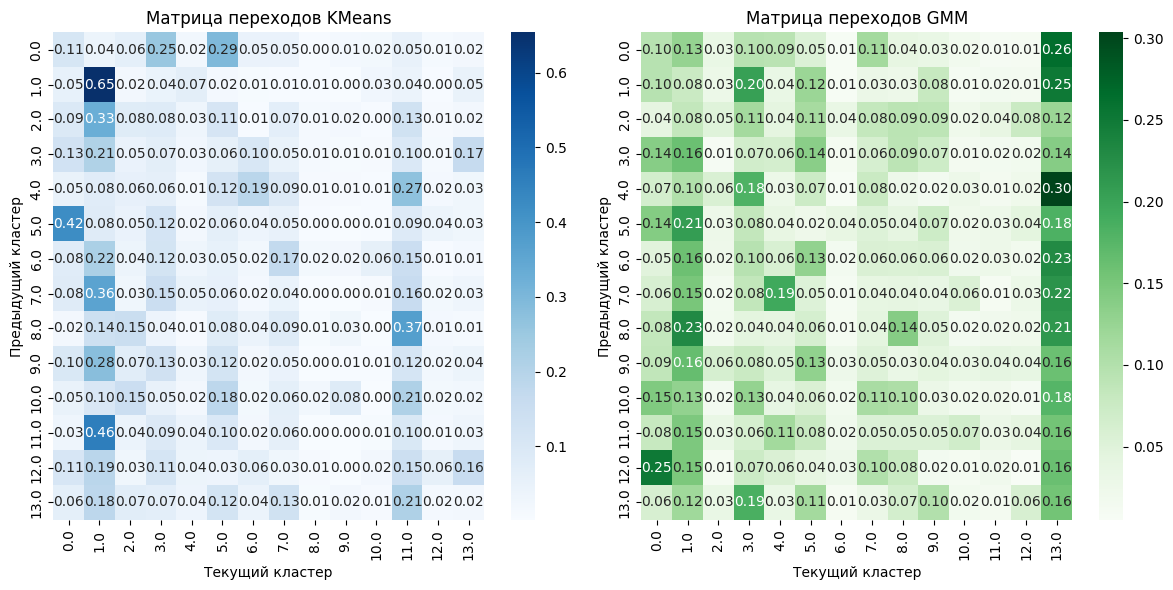

In [142]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)                                                                # KMeans
sns.heatmap(transition_matrix_kmeans, annot=True, fmt='.2f', cmap='Blues')
plt.title('Матрица переходов KMeans')
plt.xlabel('Текущий кластер')
plt.ylabel('Предыдущий кластер')

plt.subplot(1, 2, 2)                                                                # GMM
sns.heatmap(transition_matrix_gmm, annot=True, fmt='.2f', cmap='Greens')
plt.title('Матрица переходов GMM')
plt.xlabel('Текущий кластер')
plt.ylabel('Предыдущий кластер')

plt.tight_layout()
plt.show()

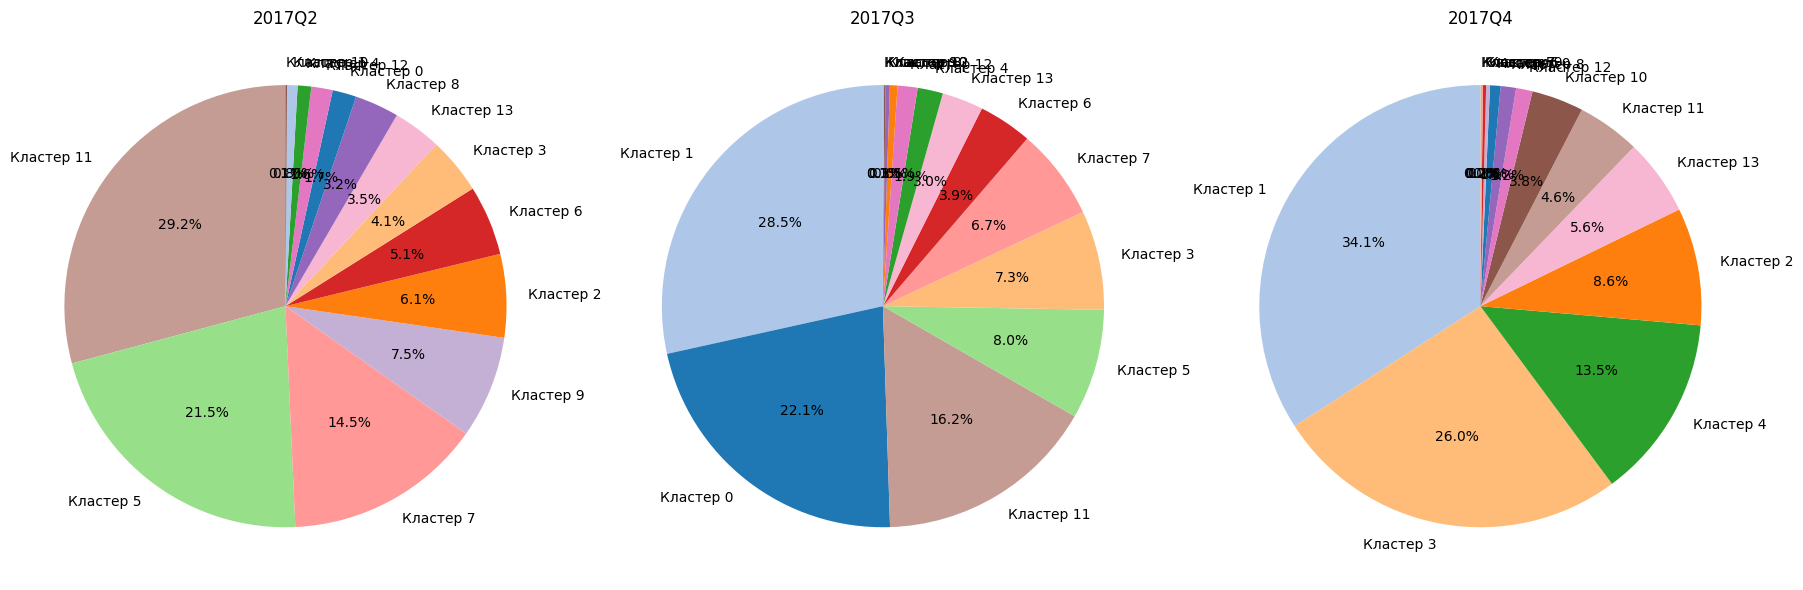

In [143]:
quarters = ['2017Q2', '2017Q3', '2017Q4']
df_filtered = df[df['quarter'].isin(quarters)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = plt.cm.tab20.colors

for i, quarter in enumerate(quarters):
    ax = axes[i]
    cluster_counts = df_filtered[df_filtered['quarter'] == quarter]['cluster_kmeans'].value_counts()
    labels = [f'Кластер {int(label)}' for label in cluster_counts.index]
    wedges, texts, autotexts = ax.pie(cluster_counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=[colors[int(label) % len(colors)] for label in cluster_counts.index])
    ax.set_title(quarter)
    ax.axis('equal')  

plt.tight_layout()
plt.show()

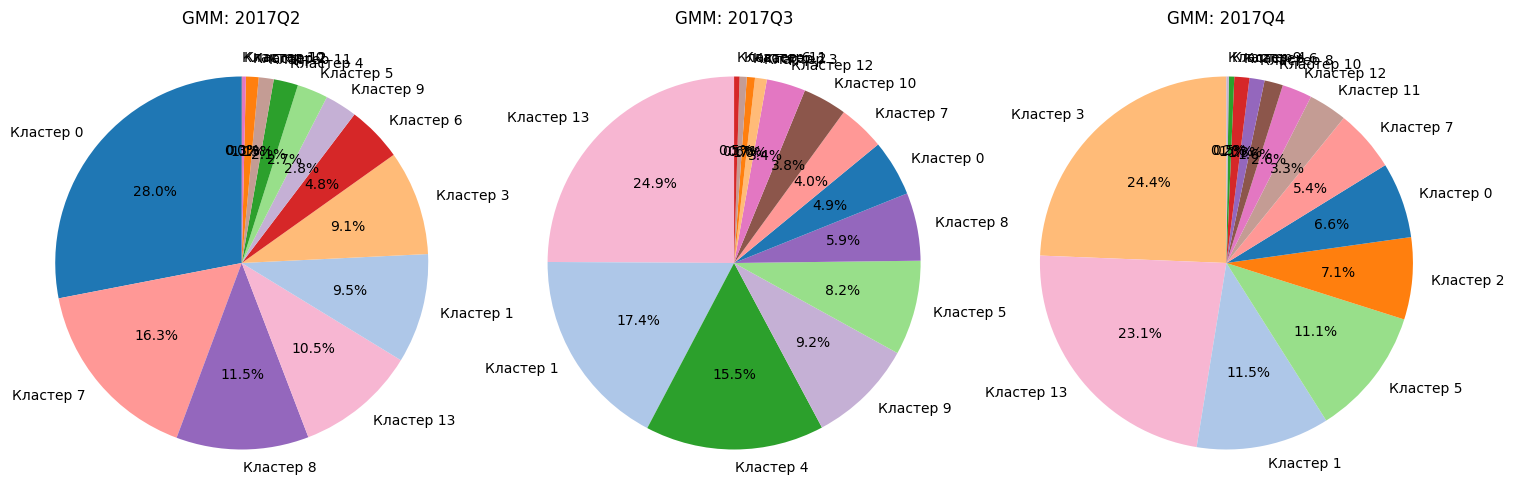

In [144]:
quarters = ['2017Q2', '2017Q3', '2017Q4']
df_filtered_gmm = df_filtered[df_filtered['quarter'].isin(quarters)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = plt.cm.tab20.colors

for i, quarter in enumerate(quarters):
    ax = axes[i]
    cluster_counts = df_filtered_gmm[df_filtered_gmm['quarter'] == quarter]['cluster_gmm'].value_counts()
    labels = [f'Кластер {int(label)}' for label in cluster_counts.index]
    wedges, texts, autotexts = ax.pie(
        cluster_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colors[int(label) % len(colors)] for label in cluster_counts.index]
    )
    ax.set_title(f'GMM: {quarter}')
    ax.axis('equal')

# RFM Clustering

In [145]:
rfm_df = customer_features.copy()

In [146]:
def assign_rfm_scores(data, column, ascending):
    quantiles = data[column].quantile([0.33, 0.66]).values
    if ascending:
        return data[column].apply(lambda x: 3 if x <= quantiles[0] else (2 if x <= quantiles[1] else 1))
    else:
        return data[column].apply(lambda x: 1 if x <= quantiles[0] else (2 if x <= quantiles[1] else 3))

In [148]:
rfm_df['R_Score'] = 0
rfm_df['F_Score'] = 0
rfm_df['M_Score'] = 0

for quarter in rfm_df['quarter'].unique():
    idx = rfm_df['quarter'] == quarter
    rfm_df.loc[idx, 'R_Score'] = assign_rfm_scores(rfm_df[idx], 'mean_days_between_orders', ascending=True)
    rfm_df.loc[idx, 'F_Score'] = assign_rfm_scores(rfm_df[idx], 'total_orders', ascending=False)
    rfm_df.loc[idx, 'M_Score'] = assign_rfm_scores(rfm_df[idx], 'total_margin', ascending=False)


In [149]:
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

In [151]:
rfm_map = {
    'VIP': ['333'],
    'Loyal': ['332', '331', '323', '322', '321'],
    'Freshers': ['311', '312', '313'],
    'Drifting': ['231', '232', '233'],
    'Sleeping': ['211', '212', '213','221', '222', '223'],
    'At Churn Risk': ['121', '122', '123', '131', '132', '133'],
    'Lost': ['111', '112', '113']
}

In [152]:
def map_segment(rfm_code):
    for name, codes in rfm_map.items():
        if rfm_code in codes:
            return name
    return 'Other'


rfm_df['segment_group'] = rfm_df['RFM_Segment'].apply(map_segment)

In [153]:
grouped = rfm_df.groupby(['quarter', 'segment_group']).size().unstack(fill_value=0)

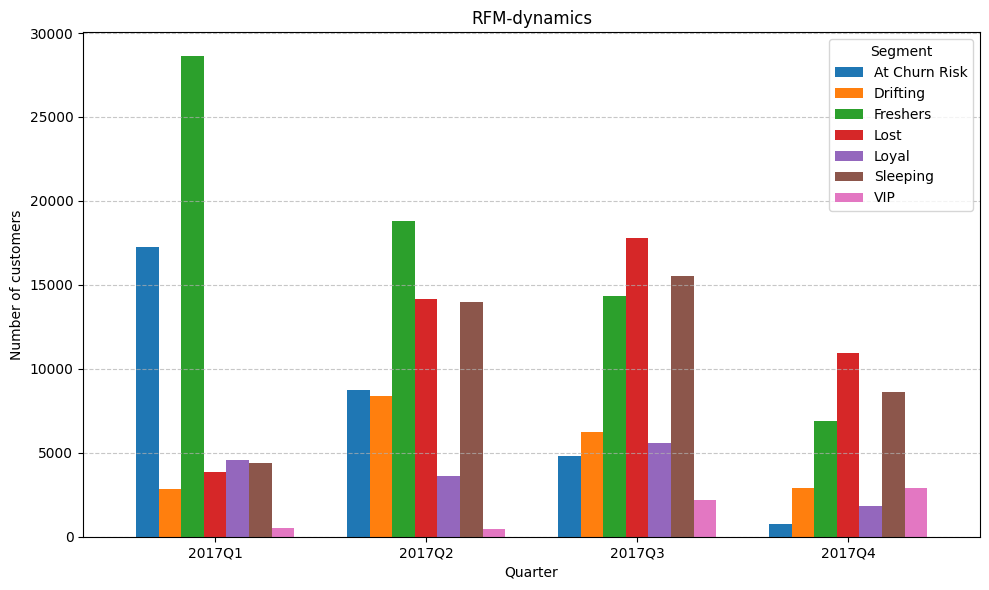

In [154]:
ax = grouped.plot(kind='bar', figsize=(10, 6), width=0.75)
plt.title('RFM-dynamics')
plt.xlabel('Quarter')
plt.ylabel('Number of customers')
plt.xticks(rotation=0)
plt.legend(title='Segment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [155]:
rfm_df

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,defect_ratio,delivery_method,good_type,Geo,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,R_Score,F_Score,M_Score,RFM_Segment,segment_group
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,2,312,Freshers
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,1,311,Freshers
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0.000000,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,2,2,122,At Churn Risk
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0.400000,5,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,3,1,2,312,Freshers
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0.538462,0,0,0,3,0,0,0,0,1,0,1,0,0,0,0,0,3,1,2,312,Freshers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,0.0,238.00,0.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,1,311,Freshers
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,0.0,343.63,0.000000,1,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0,2,1,2,212,Sleeping
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,0.0,954.22,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,1,3,313,Freshers
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,0.0,294.00,0.909091,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,2,312,Freshers


In [157]:
rfm_df = rfm_df.merge(
    df_filtered_gmm[['Телефон_new', 'quarter', 'cluster_kmeans', 'cluster_gmm']],
    on=['Телефон_new', 'quarter'],
    how='left'
)

In [160]:
# Для cluster_kmeans
if rfm_df['cluster_kmeans'].isnull().sum() > 0:
    median_kmeans = rfm_df['cluster_kmeans'].median()
    rfm_df['cluster_kmeans'].fillna(median_kmeans, inplace=True)

# Для cluster_gmm
if rfm_df['cluster_gmm'].isnull().sum() > 0:
    median_gmm = rfm_df['cluster_gmm'].median()
    rfm_df['cluster_gmm'].fillna(median_gmm, inplace=True)

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_1850/935092103.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_df['cluster_kmeans'].fillna(median_kmeans, inplace=True)
/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_1850/935092103.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [161]:
rfm_df.to_excel('rfm_df.xlsx', index=False)

In [162]:
rfm_df

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,defect_ratio,delivery_method,good_type,Geo,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,R_Score,F_Score,M_Score,RFM_Segment,segment_group,cluster_kmeans,cluster_gmm
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,2,312,Freshers,7.0,0.0
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,1,311,Freshers,5.0,5.0
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0.000000,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,2,2,122,At Churn Risk,5.0,5.0
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0.400000,5,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,3,1,2,312,Freshers,13.0,8.0
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0.538462,0,0,0,3,0,0,0,0,1,0,1,0,0,0,0,0,3,1,2,312,Freshers,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,0.0,238.00,0.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,1,311,Freshers,5.0,5.0
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,0.0,343.63,0.000000,1,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0,2,1,2,212,Sleeping,0.0,9.0
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,0.0,954.22,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,1,3,313,Freshers,5.0,5.0
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,0.0,294.00,0.909091,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,2,312,Freshers,9.0,0.0
